In [ ]:
!pip install tatc cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.4/370.4 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.7/235.7 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.2 MB/s eta 0:00:00


What is the mean revisit period over Tempe Arizona for the VIIRS instrument onboard NOAA 20?

In [ ]:
from tatc.schemas import Satellite, TwoLineElements, Instrument, Point
from tatc.utils import swath_width_to_field_of_regard

# from https://celestrak.org/NORAD/elements/gp.php?FORMAT=tle&NAME=NOAA%2020
orbit = TwoLineElements(
    tle=[
        "1 43013U 17073A   26022.94240312  .00000200  00000+0  11574-3 0  9998",
        "2 43013  98.7645 323.7982 0001179  28.0279 332.0961 14.19539020423863"
    ]
)
# from https://space.oscar.wmo.int/instruments/view/viirs
altitude_m = orbit.get_altitude()
swath_width_m = 3000e3
instrument = Instrument(
    name="VIIRS",
    field_of_regard=swath_width_to_field_of_regard(altitude_m, swath_width_m)
)
satellite = Satellite(
    name="NOAA 20",
    orbit=orbit,
    instruments=[instrument]
)

# from google
point = Point(id=0, latitude=33.4255, longitude=-111.9400)

from tatc.analysis import collect_observations, aggregate_observations, reduce_observations
from datetime import timedelta
start = orbit.get_epoch()
end = start + timedelta(days=30)
raw_observations = collect_observations(point, satellite, start, end)
aggregated_observations = aggregate_observations(raw_observations)
reduced_observations = reduce_observations(aggregated_observations)

mean_revisit_hr = reduced_observations.iloc[0].revisit/timedelta(hours=1)
display(f"mean revisit period: {mean_revisit_hr:0.1f} hours")

'mean revisit period: 9.2 hours'

What is the mean revisit period over Tempe Arizona for a VIIRS instrument with a Walker Delta constellation with 3 satellites in 3 planes following the orbit of NOAA 20?

In [ ]:
from tatc.schemas import WalkerConstellation, TwoLineElements, Instrument, Point
from tatc.utils import swath_width_to_field_of_regard

# from https://celestrak.org/NORAD/elements/gp.php?FORMAT=tle&NAME=NOAA%2020
orbit = TwoLineElements(
    tle=[
        "1 43013U 17073A   26022.94240312  .00000200  00000+0  11574-3 0  9998",
        "2 43013  98.7645 323.7982 0001179  28.0279 332.0961 14.19539020423863"
    ]
)
# from https://space.oscar.wmo.int/instruments/view/viirs
altitude_m = orbit.get_altitude()
swath_width_m = 3000e3
instrument = Instrument(
    name="VIIRS",
    field_of_regard=swath_width_to_field_of_regard(altitude_m, swath_width_m)
)
constellation = WalkerConstellation(
    name="NOAA 20",
    orbit=orbit,
    instruments=[instrument],
    configuration="delta",
    number_satellites=3,
    number_planes=3
)

# from google
point = Point(id=0, latitude=33.4255, longitude=-111.9400)

from tatc.analysis import collect_multi_observations, aggregate_observations, reduce_observations
from datetime import timedelta
start = orbit.get_epoch()
end = start + timedelta(days=30)
raw_observations = collect_multi_observations(point, constellation.generate_members(), start, end)
aggregated_observations = aggregate_observations(raw_observations)
reduced_observations = reduce_observations(aggregated_observations)

mean_revisit_hr = reduced_observations.iloc[0].revisit/timedelta(hours=1)
display(f"mean revisit period: {mean_revisit_hr:0.1f} hours")

'mean revisit period: 2.9 hours'

How does mean revisit period over Tempe Arizona change with 1-6 satellites per plane for a VIIRS instrument onboard a Walker Delta constellation with 3 planes following the orbit of NOAA 20?

In [ ]:
from tatc.schemas import WalkerConstellation, TwoLineElements, Instrument, Point
from tatc.utils import swath_width_to_field_of_regard

# from https://celestrak.org/NORAD/elements/gp.php?FORMAT=tle&NAME=NOAA%2020
orbit = TwoLineElements(
    tle=[
        "1 43013U 17073A   26022.94240312  .00000200  00000+0  11574-3 0  9998",
        "2 43013  98.7645 323.7982 0001179  28.0279 332.0961 14.19539020423863"
    ]
)
# from https://space.oscar.wmo.int/instruments/view/viirs
altitude_m = orbit.get_altitude()
swath_width_m = 3000e3
instrument = Instrument(
    name="VIIRS",
    field_of_regard=swath_width_to_field_of_regard(altitude_m, swath_width_m)
)

# from google
point = Point(id=0, latitude=33.4255, longitude=-111.9400)

number_satellites_per_plane = range(1,7)
mean_revisit_hr = [None]*len(number_satellites_per_plane)
for i, x in enumerate(number_satellites_per_plane):
    constellation = WalkerConstellation(
        name="NOAA 20",
        orbit=orbit,
        instruments=[instrument],
        configuration="delta",
        number_satellites=3*x,
        number_planes=3
    )

    from tatc.analysis import collect_multi_observations, aggregate_observations, reduce_observations
    from datetime import timedelta
    start = orbit.get_epoch()
    end = start + timedelta(days=30)
    raw_observations = collect_multi_observations(point, constellation.generate_members(), start, end)
    aggregated_observations = aggregate_observations(raw_observations)
    reduced_observations = reduce_observations(aggregated_observations)
    mean_revisit_hr[i] = reduced_observations.iloc[0].revisit/timedelta(hours=1)

for (x, t) in zip(number_satellites_per_plane, mean_revisit_hr):
    display(f"mean revisit period for {x} satellites per plane: {t:0.2f} hours")

'mean revisit period for 1 satellites per plane: 2.95 hours'

'mean revisit period for 2 satellites per plane: 1.42 hours'

'mean revisit period for 3 satellites per plane: 0.91 hours'

'mean revisit period for 4 satellites per plane: 0.66 hours'

'mean revisit period for 5 satellites per plane: 0.51 hours'

'mean revisit period for 6 satellites per plane: 0.41 hours'

What is the ground track for the VIIRS instrument onboard NOAA 20 over a 30-minute period?

'ground track polygon: POLYGON Z ((-164.34967937580342 36.20165165403476 0, -164.34967937580345 36.20165165403474 0, -164.89144241181097 37.41607456664963 0, -165.74531587239892 38.5422078202407 0, -165.7453158723989 38.542207820240705 0, -166.33980887387537 39.746116390592945 0, -167.25503677290013 40.85834622580289 0, -167.25503677290007 40.858346225802904 0, -167.90949135226853 42.050214856869 0, -168.89390609495655 43.14642057359129 0, -169.61684619035228 44.324441244614874 0, -170.67948065110266 45.402111458267896 0, -171.48096083261618 46.56412425047583 0, -172.6322174666942 47.620272019048045 0, -172.63221746669421 47.62027201904804 0, -173.52409182171934 48.763676664578625 0, -174.77590955000144 49.794737094684976 0, -174.77590955000142 49.79473709468499 0, -175.77212022948783 50.91638045925158 0, -177.13811594488368 51.91808903958932 0, -177.1381159448837 51.91808903958932 0, -178.2549746775512 53.01412270155311 0, -179.75051856033673 53.98137422618107 0, -179.75051856033676 5

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


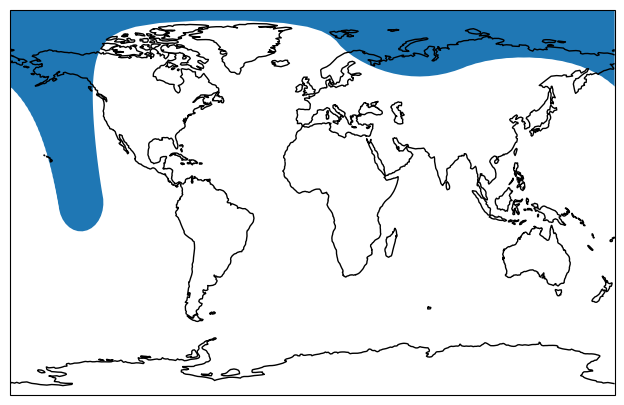

In [ ]:
from tatc.schemas import Satellite, TwoLineElements, Instrument, Point
from tatc.utils import swath_width_to_field_of_regard
import geopandas as gpd


# from https://celestrak.org/NORAD/elements/gp.php?FORMAT=tle&NAME=NOAA%2020
orbit = TwoLineElements(
    tle=[
        "1 43013U 17073A   26022.94240312  .00000200  00000+0  11574-3 0  9998",
        "2 43013  98.7645 323.7982 0001179  28.0279 332.0961 14.19539020423863"
    ]
)
# from https://space.oscar.wmo.int/instruments/view/viirs
altitude_m = orbit.get_altitude()
swath_width_m = 3000e3
instrument = Instrument(
    name="VIIRS",
    field_of_regard=swath_width_to_field_of_regard(altitude_m, swath_width_m)
)
satellite = Satellite(
    name="NOAA 20",
    orbit=orbit,
    instruments=[instrument]
)

from tatc.analysis import compute_ground_track
from tatc.utils import compute_ground_velocity
from datetime import timedelta
import pandas as pd
start = orbit.get_epoch()
end = start + timedelta(minutes=30)
inclination_deg = orbit.get_inclination()
max_delta_t_s = swath_width_m / compute_ground_velocity(altitude_m, inclination_deg)
delta_t = timedelta(seconds=max_delta_t_s / 10)
times = pd.date_range(start, end, freq=delta_t)
ground_track = compute_ground_track(satellite, times, crs="spice")

display(f"ground track polygon: {ground_track.iloc[0].geometry}")

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
fig, ax = plt.subplots(figsize=(8, 5), subplot_kw={"projection": ccrs.PlateCarree()})

ground_track.plot(
    ax=ax,
    transform=ccrs.PlateCarree()
)
ax.coastlines()
ax.set_global()
plt.show()

Perform a global coverage analysis with mean revisit period for the VIIRS instrument onboard NOAA 20 for sample points equally spaced at 5000 km.

,point_id,geometry,mean_revisit_hr
0,0,POINT Z (-157.51699 -67.51699 0),0.917015
1,1,POINT Z (-112.55097 -67.51699 0),0.920094
2,2,POINT Z (-67.58495 -67.51699 0),0.918702
3,3,POINT Z (-22.61894 -67.51699 0),0.917383
4,4,POINT Z (22.34708 -67.51699 0),0.920032
5,5,POINT Z (67.3131 -67.51699 0),0.916969
6,6,POINT Z (112.27912 -67.51699 0),0.918704
7,7,POINT Z (157.24514 -67.51699 0),0.920023
8,8,POINT Z (-157.51699 -22.55097 0),3.259060
9,9,POINT Z (-112.55097 -22.55097 0),3.343699


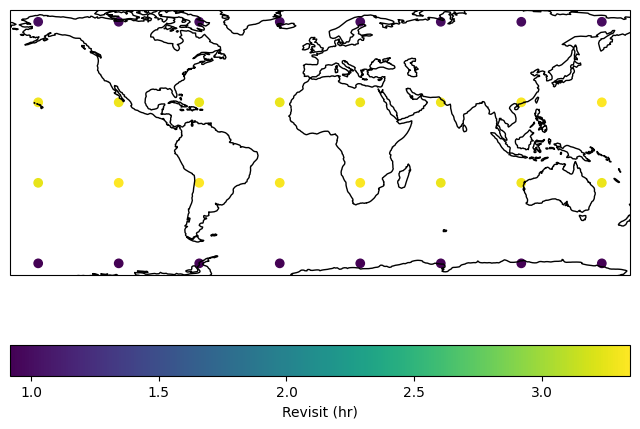

In [ ]:
from tatc.schemas import WalkerConstellation, TwoLineElements, Instrument, Point
from tatc.utils import swath_width_to_field_of_regard

# from https://celestrak.org/NORAD/elements/gp.php?FORMAT=tle&NAME=NOAA%2020
orbit = TwoLineElements(
    tle=[
        "1 43013U 17073A   26022.94240312  .00000200  00000+0  11574-3 0  9998",
        "2 43013  98.7645 323.7982 0001179  28.0279 332.0961 14.19539020423863"
    ]
)
# from https://space.oscar.wmo.int/instruments/view/viirs
altitude_m = orbit.get_altitude()
swath_width_m = 3000e3
instrument = Instrument(
    name="VIIRS",
    field_of_regard=swath_width_to_field_of_regard(altitude_m, swath_width_m)
)
constellation = WalkerConstellation(
    name="NOAA 20",
    orbit=orbit,
    instruments=[instrument],
    configuration="delta",
    number_satellites=3,
    number_planes=3
)

# from google
from tatc.generation import generate_equally_spaced_points

mean_distance_m = 5000e3
points_df = generate_equally_spaced_points(mean_distance_m)
points = points_df.apply(lambda r: Point(id=r.point_id, latitude=r.geometry.y, longitude=r.geometry.x), axis=1)

from tatc.analysis import collect_multi_observations, aggregate_observations, reduce_observations
from datetime import timedelta
start = orbit.get_epoch()
end = start + timedelta(days=30)
raw_observations = pd.concat([
    collect_multi_observations(point, constellation.generate_members(), start, end)
    for point in points
])
aggregated_observations = aggregate_observations(raw_observations)
reduced_observations = reduce_observations(aggregated_observations)

reduced_observations["mean_revisit_hr"] = reduced_observations.apply(
    lambda r: r["revisit"] / timedelta(hours=1), axis=1
)
display(reduced_observations[["point_id", "geometry", "mean_revisit_hr"]])

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={"projection": ccrs.PlateCarree()})
reduced_observations.plot(
    column="mean_revisit_hr",
    cmap="viridis",
    legend=True,
    legend_kwds={"label": "Revisit (hr)", "orientation": "horizontal"},
    ax=ax,
    transform=ccrs.PlateCarree()
)
ax.coastlines()
plt.show()